# Quantum Machine Learning for detecting financial crashes

### Learning objectives of the challenge

**1.** How to use classical topological data analysis, TDA, for financial bubble early warning? <br>
**2.** How to implement its quantum counterpart? <br>
**3.** Conduct a resource analysis on the quantum algorithm. Which step is most costly? <br>
**4.** Get used to Quantum Phase Estimation, QPE. <br>
**5.** How is the influence of the classical noise (the random fluctuations in financial markets)? <br>
**6.** How is the influence of quantum noise? <br>

## The challenge

### Main idea

Topological Data Analysis (TDA) is a robust and innovative technique that has demonstrated impressive results in detecting financial crashes—critical transitions between financial regimes—and providing early warning signals. By analyzing changes in Betti numbers, TDA can reveal shifts in underlying structures that precede these transitions. In this notebook, we employ a quantum TDA algorithm to calculate Betti numbers, enabling effective early detection of financial crashes.

### What is topological data analysis

Topology studies the properties of geometric objects that are preserved under continuous deformations, such as stretching, twisting, crumpling, and bending. Homology serves as a tool to study and quantify the topological properties of spaces. The homology of an object is often summarized using $k$-th Betti numbers, which count the number of $k$-dimensional holes within the object. For example, the zeroth Betti number, $\beta_0$, counts the number of connected components; the first Betti number, $\beta_1$, counts the number of loops; and the second Betti number, $\beta_2$, counts the number of enclosed volumes, and so on.

In finance, input data is typically represented as time series, which are subsequently transformed into a series of discrete points. To model the underlying structure with them, we construct a simplicial complex (specifically, a Vietoris–Rips complex), a collection of simple shapes that connect the points together. Those simple shapes are called simplex, and they are generalization of the notion of a triangle or tetrahedron to arbitrary dimensions. A $k$-simplex is a collection of $k + 1$ vertices with $k(k + 1)/2$ edges in $k$ dimensions. A resolution threshold, $\epsilon$, is chosen so that any two points within $\epsilon$ distance of each other are connected by a line segment in the simplicial complex. As $\epsilon$ increases, more connections are added, and lower-order components may merge into higher-order components. This results in a decrease in the lower-order Betti numbers and an increase in the higher-order Betti numbers. The study of how topological properties change across a sequence of resolution thresholds is called persistent homology.

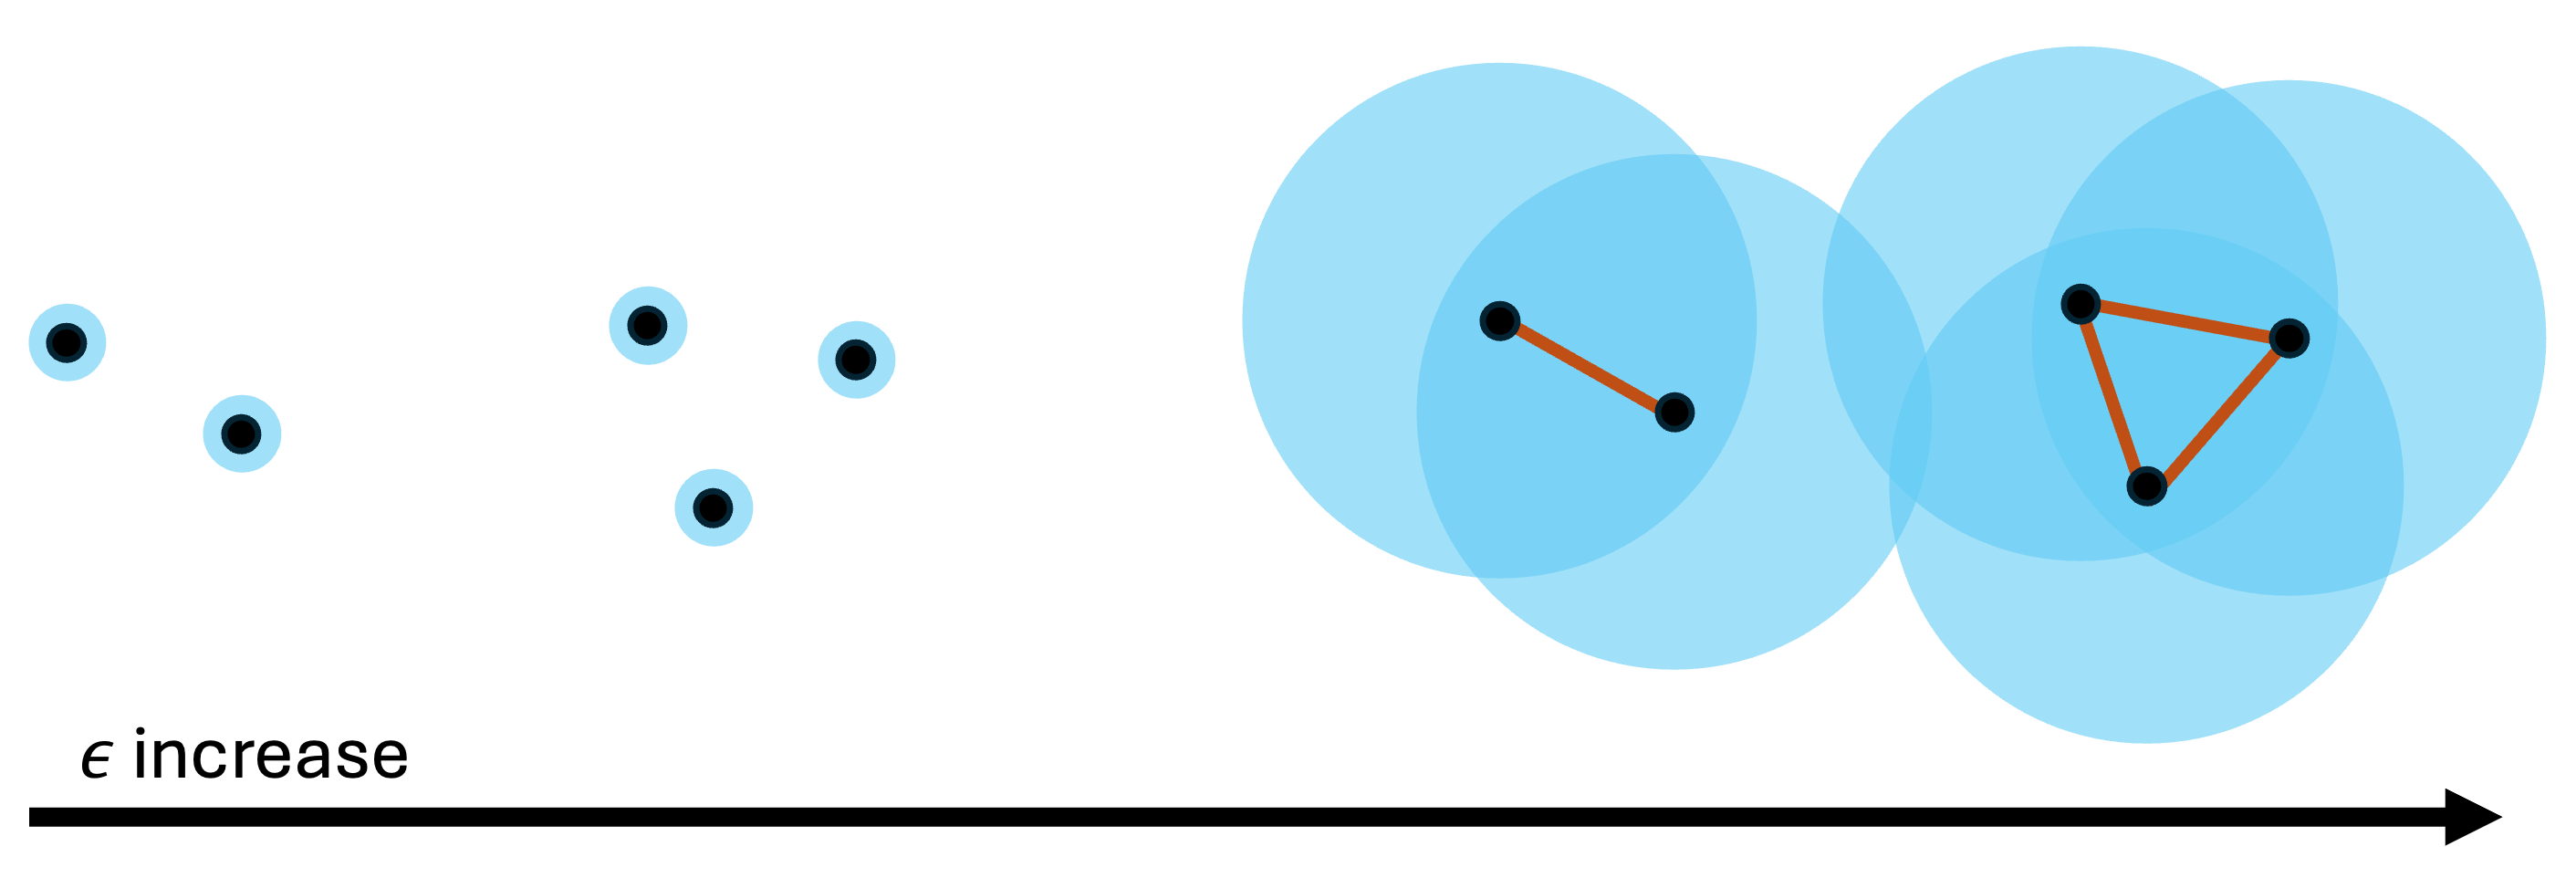

For example, consider the figure above, which consists of five points. When $\epsilon$ is small, no lines connect the points. Consequently, $\beta_0 = 5$, as there are five discrete points, each representing an independent connected component, and no higher-dimensional features are present. As $\epsilon$ increases, the Betti numbers for the configuration on the right become:

* $\beta_0=2$: There are two connected components (a line segment and a triangle).
* $\beta_1=1$: There is one 1-dimensional hole (the triangle encloses a region).
* $\beta_k=0$ for $k\ge2$: No higher-dimensional features exist.

This example also illustrates how Betti numbers change with the resolution threshold. The sequence of Betti numbers as the resolution threshold varies forms a curve known as the Betti curve. This curve can be utilized as input for kernel construction in machine learning applications.

### What is quantum TDA?

TDA can be used for extracting complex and valuable shape-related summaries of high-dimensional data. However, as the size of the dataset grows, the number of simplices considered increases significantly, leading to an exponential rise in the computational complexity of TDA algorithms ([ref](https://quantum-journal.org/papers/q-2022-11-10-855/)). 

Quantum computers have the potential to significantly accelerate TDA algorithms. Lloyd et al. introduced a fully quantum TDA algorithm leveraging quantum random access memory (qRAM), Grover's search algorithm, and quantum phase estimation (QPE) ([ref](https://www.nature.com/articles/ncomms10138)). In this approach, classical data is first loaded and encoded into the quantum amplitudes of a quantum state via qRAM. Grover's algorithm is then employed to construct the simplex state, with a membership function used to determine whether a given simplex belongs to the complex. Finally, the combinatorial Laplacian (also referred to as the "Dirac operator") is constructed, and the Betti numbers—key topological invariants—are extracted using QPE. 

However, this quantum TDA algorithm is really costly for NISQ computers. Even more, the qRAM requires long-lasting quantum coherence and low computational error to store and process the loaded data. Several exciting alternatives approaches have been proposed since then. It must be noted that quantum TDA is one of the first quantum machine learning algorithms with short depth and potential significant speedup under certain assumptions.

Here is a list of different versions of quantum TDA. Note that they may be beyond the scope of this challenge, and mainly for your interest:

* [QTDA via the estimation of the density of states (December 2023, University of Exeter)](https://arxiv.org/abs/2312.07115)
* [NISQ-TDA  (Sep 2022, IBM Research + University of the Witwatersrand)](https://arxiv.org/pdf/2209.09371)
* [Quantum persistent homology (Nov 2022, University of Tennessee)](https://arxiv.org/abs/2211.04465)
* [Hybrid qTDA (Oct 2022, Deloitte)](https://arxiv.org/abs/2209.10596)
* [Quantum-Enhanced TDA (Feb 2023, Tata Consultancy Services)](https://arxiv.org/pdf/2302.09553)

### Does TDA have applications in finance?

Betti numbers offer valuable insights into the structure and shape of complex data. While their use in finance is still in its early stages, they show promise in various applications, such as credit risk prediction ([ref](https://ora.ox.ac.uk/objects/uuid:9f4bed48-1763-486f-acbe-393670fab6bb/files/skw52j939s)), fraud detection, financial bubble detection ([ref](https://arxiv.org/abs/2304.06877)), capturing financial instability ([ref](https://arxiv.org/pdf/2110.00098)), etc. It can also be used as an unsupervised learning algorithm for anomaly detection.

Several studies suggest that Betti numbers serve as effective indicators of market crashes. The zeroth betti number $\beta_0$ is small at the beginning of a market crash and increases as the market crash progresses. It can be interpreted as that there is a giant connected component in the market just before the crash, and as the market crashed, this broke up into many smaller components ([ref](https://www.mdpi.com/1099-4300/23/9/1211), [ref](https://www.frontiersin.org/journals/physics/articles/10.3389/fphy.2021.572216/full)). 

This concept serves as the foundation for the idea behind this challenge.

## Problem Statement - Detecting financial bubbles by using quantum topological data analysis (qTDA)

The goal of this challenge is to build a quantum TDA pipeline for detecting financial market crashes. The process is outlined in the following key steps, with detailed instructions provided below. Follow the **Instructions** and **Action** parts carefully and implement the necessary code after **Answer** to complete the pipeline.

These references deal with the problem at hand and can be helpful to consult:
* [Quantum-Enhanced Topological Data Analysis: A  Peep from an Implementation Perspective](https://arxiv.org/pdf/2302.09553)
* [Towards Quantum Advantage via Topological Data  Analysis](https://quantum-journal.org/papers/q-2022-11-10-855/)

<div class="alert alert-block alert-success"> 
    
**STEPS**
    
* Input: a time series of stock price; Output: a time-evolution of topological properties.

* Preparing point cloud
    * Apply Taken's embedding.
    * Apply a sliding window for obatining a time-varying point-cloud.
* Building Laplacian
    * Construct the Vietoris-Rips (VR) complex from the point cloud using [`GUDHI`](https://gudhi.inria.fr/).
    * Build the boudnary operator of this complex.
    * Build the Laplacian matrix based on the boundary operators, then pad it and rescale it.
* Applying quantum phase estimation
    * Use Quantum Phase Estimation (QPE) to find the number non-zero eigenvalues of the Laplacian matrix. Round up the results and get the Betti numbers.
    * Vary the resolution threshold and obtain a series of Betti numbers, which are the Betti curves.
* Detecting financial market crashes
    * Find the relation between Betti numbers and financial market crashes.
    
 </div>

<div class="alert alert-block alert-info"> <b>NOTE</b>:

In the coding process, it is recommended to start with the following initial values for the variables: 

* `N = 4` # dimension of vectors
* `d = 5`  # time delay
* `w = 5`  # window size
* `epsilon = 0.1` # resolution threshold
* `q = 3` # number of precision qubits

However, you will be tasked with determining the optimal values later in this challenge.

</div>

### Step 0: Loading data


To assess the practical applicability of TDA with quantum techniques, we will analyze a small dataset of the S&P 500 index from the period surrounding the 2008 financial crisis. You may find the associated file: *SP500.csv*

In [274]:
import pandas as pd
import numpy as np

# time_series = np.log(pd.read_csv("SP500.csv", header=None).to_numpy().squeeze())
time_series = np.log(pd.read_csv("sp500_full.csv", header=None, usecols=[1]).to_numpy().squeeze())

In [275]:
N = 4 # dimension of vectors
d = 5 # time delay
w = 5 # window size
epsilon = [0.1, 0.2, 0.3, 0.4] # resolution threshold
q = 3 # number of precision qubits

### Step 1: Preparing point cloud

**Instruction:**

Consider a time series $X = \{x_0, x_1, \ldots, x_{L-1}\}$ of numerical values of length $L$ as input. We choose and fix an embedded dimension $N$ and a time-delay $d \ge 1$. Taken's embedding theorem convert this time series into a series of $N$-dimensional time-delay coordinate vectors $Z=\{z_0, z_1, \dots, z_{L-1-(N-1)d}\}$:

$$
\begin{align*}
z_0 =& (x_0, x_d, \ldots, x_{(N-1)d}),\\
z_1 =& (x_1, x_{1+d}, \ldots, x_{1+(N-1)d}),\\
\vdots\\
z_t =& (x_t, x_{t+d}, \ldots, x_{t+(N-1)d}),\\
\vdots&\\
z_{L-1-(N-1)d} =& (x_{L-1-(N-1)d}, x_{L-1-(N-2)d}, \ldots, x_{L-1}).
\end{align*}
$$

To detect qualitative changes along a time series, we apply a sliding window of size $w$ and assess how topological properties change along the sliding window. For a proper size, $w$ needs to fullfill $N \ll w \ll L$. The sliding window gives a time-varying point cloud embedded in $\mathcal{R}^N$:

$$
Z^t = \{z_t, z_{t+1}, \ldots, z_{t+w-1}\}, \quad \text{for } t \in \{0, \ldots, K-1\}
$$

**Action:**

Following Takens' embedding theorem, transform the `time_series` into a series of $ N $-dimensional vectors. Afterward, apply a sliding window to these vectors and obtain a time-varying point cloud.

**Answer:**

In [276]:
# what is K????

# write your code here

print(time_series)
time_series.shape

[7.28632869 7.26318945 7.24288733 ... 8.47448922 8.47413432 8.47083507]


(5536,)

Apply Taken's Theorem

In [277]:
def apply_taken_theorem(input_data, n=N, d=d):
    res_datapoints = []
    L = np.shape(input_data)[0]
    for res_datapoint_starting_idx in range(int((L - 1) - (n - 1) * d) + 1):
        tekin_datapoint = []
        for tekin_offset_idx in range(0, (n - 1) * d + 1, d):
            tekin_idx = res_datapoint_starting_idx + tekin_offset_idx
            if (tekin_idx >= 0) and (tekin_idx <= L - 1):
                # print(f"tekin_idx: {tekin_idx}")
                tekin_datapoint.append(input_data[tekin_idx])
        res_datapoints.append(tekin_datapoint)
    return np.array(res_datapoints)
    

In [278]:
tekin_applied_datapoints = apply_taken_theorem(time_series)

In [279]:
tekin_applied_datapoints.shape

(5521, 4)

In [280]:
def create_time_series_sliding(input_data, w=w):
    time_series_data = []
    for t in range(input_data.shape[0] - w + 1):
        sliding_window_pt = input_data[t:t + w]
        time_series_data.append(np.array(sliding_window_pt))
    return np.array(time_series_data)
    

In [281]:
time_series_sliding = create_time_series_sliding(tekin_applied_datapoints)

In [282]:
time_series_sliding.shape

(5517, 5, 4)

In [283]:
import gtda.time_series
given_taken_embedding = gtda.time_series.TakensEmbedding(time_delay = d, dimension = N, stride = 1)

In [284]:
sliding_window = gtda.time_series.SlidingWindow(size=w, stride=1)

In [285]:
data_taken_embedding = given_taken_embedding.fit_transform(time_series.reshape(1, -1))

In [286]:
data_taken_embedding.shape

(1, 5521, 4)

In [287]:
data_taken_embedding = data_taken_embedding[0]

In [288]:
data_taken_embedding.shape

(5521, 4)

In [289]:
window_embedding = sliding_window.fit_transform(data_taken_embedding)

In [290]:
window_embedding.shape

(5517, 5, 4)

In [291]:
print(np.array_equal(time_series_sliding, window_embedding))

True


<div class="alert alert-block alert-danger">
    
<b>BONUS EXERCISE:</b> 

`gtda.time_series.TakensEmbedding` can conduct this transformation. Try avoid using this function and build your own embedding function.

</div>

<div class="alert alert-block alert-info"> <b>NOTE</b>:

From step 2, we present an example originally provided in the appendix of [Khandelwal's and Chandra's paper](https://arxiv.org/abs/2302.09553). This example can be used to verify your code.

</div>

### Step 2: Building Laplacian

**Instruction:**

In this step, we are going to use `GUDHI`, a Python package specialized in TDA and and higher dimensional geometry understanding. For detailed instructions on the functions we will use, please refer to [this website](https://gudhi.inria.fr/python/latest/rips_complex_user.html#).

A simplicial complex is constructed on the point cloud using `gudhi.RipsComplex` class, followed by its `create_simplex_tree` method. The resolution threshold `epsilon` is set via the `max_edge_length` parameter. This process identifies the connectivity of the complex within the resolution threshold and produces a simplex tree. The simplex tree serves as a general representation of simplicial complexes. Using its `get_filtration` method, simplicies are retrieved as a collection of lists, where elements are grouped based on their connections. Each dimension up to a specified maximum is represented by its respective collection of lists.

**Example:**

Here is an example of a simplex tree $\mathcal{K}$ with a maximum dimension of 2. In its zeroth dimension, each point is a connected component; In the first dimension, 6 line segments connect 6 pairs of points $[1, 2], [1, 3], [2, 3], [3, 4], [3, 5], [4, 5]$; In the second dimension, a filled trangle is formed among points $[1 ,2 ,3]$.

$$
\mathcal{K} = [[[1], [2], [3], [4], [5]],[[1, 2], [1, 3], [2, 3], [3, 4], [3, 5], [4, 5]], [[1, 2, 3]]]
$$

**Action:**

Build a simplicial complex by applying functions from `GUDHI` on the point cloud obtained in step 1, and extract its simplex tree. It is recommended to store the simplex tree in a format similar to the example provided, i.e., in the format $[S_0, S_1, S_2, \dots]$, where $S_i$ represents the set of $i$-simplices.

**Answer:**

In [292]:
import gudhi

In [293]:
# write your code here
def create_simplicial_simplex(time_series_data, epsilon=epsilon[0], n=N):
    simplex_trees = []
    # TODO: check this via the documentation
    for time_window in time_series_data:
        rips_complex = gudhi.RipsComplex(points=time_window, max_edge_length=epsilon)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=n)
        simplex_trees.append(simplex_tree)
    return np.array(simplex_trees)
    

In [294]:
time_series_sliding.shape

(5517, 5, 4)

In [295]:
simplex_tree_k = create_simplicial_simplex(time_series_sliding, epsilon=epsilon[0], n=N)
simplex_tree_k.shape

(5517,)

In [296]:
# Compute persistence for each simplex tree and then calculate Betti numbers
for simplex_tree in simplex_tree_k:
    simplex_tree.compute_persistence()

# Now you can call betti_numbers() on each simplex tree
betti_numbers_list = [simplex_tree.betti_numbers() for simplex_tree in simplex_tree_k]

print(betti_numbers_list)

[[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0

In [322]:
max_length_classical = max(len(sublist) for sublist in betti_numbers_list)
betti_numbers_all_classical = np.empty((window_embedding.shape[0],N+1))
betti_numbers_all_classical = np.array([sublist + [0] * (max_length_classical - len(sublist)) 
                         for sublist in betti_numbers_list])

In [324]:
betti_numbers_all_classical.shape

(5517, 4)

In [323]:
np.save("betti_numbers_classical.npy", betti_numbers_all_classical)

**Instruction:**

Let $S_k$ be the set of $k$-simplicies in the complex $\mathcal{K}$ with individual simplicies denoted by $s_k ∈ S_k$ written as $[j_0, j_1, \dots, j_k]$ where $j_i$ is the $i$-th vertex of $s_k$. Note that the vertices are ordered in ascending fashion in the initial point cloud, and this order is kept throughout. The restricted boundary operator $\partial_k$ is defined on the $k$-simplicies as:

$$
\begin{align*}
\partial_k s_k &= \sum_{t=0}^{k} (-1)^t [v_0, \dots, v_{t-1}, v_{t+1}, \dots, v_k]\\
&= \sum_{t=0}^{k} (-1)^t s_{k-1} (t)
\end{align*}
$$

where $s_{k−1}(t)$ is defined as the lower simplex defined from $s_k$ by leaving out the vertex $v_t$. 

**Example:**

In the simplex tree $\mathcal{K}$ we have 1 2-simplex and 6 1-simplicies. By leaving out vertice $v_0=1$, $v_1=2$, $v_2=3$, we obtain the lower simplex $s_1=[2, 3]$, $s_2=[1, 3]$, $s_3=[1, 2]$, respectively. Therefore, the boundary operator on the 2-simplicies $\partial_2$ should be a 6-by-1 matrix:

$$
\partial_2 =
\begin{bmatrix}
1 \\
-1 \\
1 \\
0 \\
0 \\
0
\end{bmatrix}
$$

In the same way, the boundary operator on the 1-simplicies $\partial_1$ is:

$$
\partial_1 =
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & 0 & 0 \\
0 & -1 & -1 & 1 & 1 & 0 \\
0 & 0 & 0 & -1 & 0 & 1 \\
0 & 0 & 0 & 0 & -1 & -1
\end{bmatrix}
$$

**Action:**

Define a function that generates the boundary operator for a specified dimension, using a given simplex tree as input.

**Answer:**

In [297]:
# chatgpt
# this one is to convert the simplex tree to a nested list
def convert_gudhi_simplex_tree(simplex_tree):
    """
    Convert a GUDHI SimplexTree into a nested list format.
    
    Parameters:
        simplex_tree: A GUDHI SimplexTree object that has been built (e.g., from Rips complex).
        
    Returns:
        A list of lists where the i-th element is a list of all i-simplices.
        Each simplex is represented as a sorted list of vertices.
        
        For example:
        [
            [[1], [2], [3], [4], [5]],                    # 0-simplices
            [[1, 2], [1, 3], [2, 3], [3, 4], [3, 5], [4, 5]],  # 1-simplices
            [[1, 2, 3]]                                   # 2-simplices
        ]
    """
    # Get all simplices along with their filtration values.
    # The result is a list of tuples: (simplex, filtration_value)
    simplices_with_filtration = simplex_tree.get_filtration()
    
    # We'll group simplices by their dimension.
    simplex_dict = {}  # keys: dimension, value: list of simplices
    
    for simplex, _ in simplices_with_filtration:
        # In GUDHI, a simplex is typically returned as a tuple of vertices.
        # Its dimension is len(simplex) - 1.
        dim = len(simplex) - 1
        # Ensure the simplex is in sorted order.
        simplex_sorted = sorted(simplex)
        if dim not in simplex_dict:
            simplex_dict[dim] = []
        simplex_dict[dim].append(simplex_sorted)

    for dim in simplex_dict:
        simplex_dict[dim].sort(key=lambda s: tuple(s))
    
    # Now, we convert the dictionary to a list of lists.
    # Determine the maximum dimension present.
    max_dim = max(simplex_dict.keys())
    # Create a list for each dimension from 0 to max_dim.
    nested_list = [simplex_dict.get(dim, []) for dim in range(max_dim + 1)]
    
    return nested_list

This is from the example

In [298]:
test_simplex_tree_list = [[[1], [2], [3], [4], [5]],[[1, 2], [1, 3], [2, 3], [3, 4], [3, 5], [4, 5]], [[1, 2, 3]]]

This function is to calculate all the possible boundary operators of each simplex tree

In [299]:
#joe's codes

def joe_make_boundary_operator(simplex_tree):
    max_dim = len(simplex_tree) - 1  # Max dimension in the simplex tree
    boundary_operators = []
    
    for dim in range(1, max_dim + 1):
        simplices = simplex_tree[dim]  # Simplices of current dimension
        lower_simplices = simplex_tree[dim - 1]  # Simplices of lower dimension
        
        row_count = len(lower_simplices)
        col_count = len(simplices)
        boundary_matrix = np.zeros((row_count, col_count))  # Ensure integer output
        
        for j, simplex in enumerate(simplices):  # Iterate over higher-dim simplices
            for i, face in enumerate(lower_simplices):  # Iterate over lower-dim simplices
                if set(face).issubset(set(simplex)):
                    missing_vertex = list(set(simplex) - set(face))[0]  # Find the missing vertex
                    sign = (-1) ** simplex.index(missing_vertex)  # Compute sign based on position of missing vertex
                    boundary_matrix[i, j] = sign
        
        boundary_operators.append(boundary_matrix)  # Convert to list for expected output
    
    return boundary_operators
        


In [300]:
print(joe_make_boundary_operator(test_simplex_tree_list))

[array([[-1., -1.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  1.,  1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]]), array([[ 1.],
       [-1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.]])]


Make a list of 64 simplex trees in the form of nested list

Get_Boundary_Operators(index) -- use to get the list boundary operators of a simplex tree (ascending order, ignoring $\partial_0$)  $\partial_1 \rightarrow \partial_n$ 

In [301]:
ListOf_simplex_tree = []
for simplex_tree in simplex_tree_k:
    simplex_tree_list = convert_gudhi_simplex_tree(simplex_tree)
    ListOf_simplex_tree.append(simplex_tree_list)

def Get_Boundary_Operators(index, verbal=True):
    boundary_operators = joe_make_boundary_operator(ListOf_simplex_tree[index])
    if verbal:
        print(f"Boundary Operators for Simplex Tree {index}: \n")
        for i, matrix in enumerate(boundary_operators):
            print(f"Boundary Operator {i + 1}:")
            print(matrix)
    return boundary_operators

In [302]:
Get_Boundary_Operators(0)

Boundary Operators for Simplex Tree 0: 

Boundary Operator 1:
[[-1. -1. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -1. -1. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0. -1. -1.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  1.  0. -1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  1.  1.]]
Boundary Operator 2:
[[ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1. -1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. -1.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  1.]]
Boundary Operator 3:
[[-1. -1.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.]
 [-1.  0.  0. -1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0. -1. -1.  0.]
 [ 1.  0.  0.  0. -1.]
 [ 0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0. -1.]
 [ 0.  0.  0.  1.  1.]]
Boundary Operator 

[array([[-1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  1.,  0.,  0., -1., -1.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0., -1.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.]]),
 array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0., -1., -1.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.]]),
 array([[-1., -1.,  0.,  0.,  0.],
        [ 1.,  0., -1.,  0.,  0.],
        [ 0.,  1.,  1.,  0

**Instruction:**

The combinatorial laplacian $\Delta_k$ is defined as:

$$
\Delta_k = \left( \partial_k \right)^\dagger \partial_k 
+ \partial_{k+1} \left( \partial_{k+1} \right)^\dagger
$$

The QPE algorithm will be used to estimate the number of zero eigenvalues of the Laplacian matrix. Since its exponential matrix serves as the unitary matrix in this algorithm, it must have dimensions $2^q \times 2^q$, where $q$ represents the number of target qubits. It is recommanded to pad the combinatorial laplacian $\Delta_k$ with an identity matrix with $\tilde{\lambda}_{max}/2$ in place of ones, where $\tilde{\lambda}_{max}$ is the estimate of the maximum eigenvalue of $\Delta_k$ using the Gershgorin circle theorem ([details](https://mathworld.wolfram.com/GershgorinCircleTheorem.html)), such that:

$$
\tilde{\Delta}_k =
\begin{bmatrix}
\Delta_k & 0 \\
0 & \frac{\widetilde{\lambda}_{\text{max}}}{2} \cdot I_{2q - |S_k|}
\end{bmatrix}_{2q \times 2q}
$$

where $\Delta_k$ is the padded combinatorial laplacian and $q = \lceil \log_2 |S_k| \rceil$ is the number of qubits this operator will act on. In QPE, as $2\pi\theta$ increases beyond $2\pi$, the eigenvalues will start repeating due to their periodic form. Thus, $\theta$ is restricted to $[0, 1)$. As $\lambda \to 2\pi\theta$ this means that $λ \in [0, 2\pi)$. Thus, we need to restrict the eigenvalues of the combinatorial laplacian to this range. This can be achieved by rescaling $\tilde{\Delta}_k$ by $\delta/\tilde{\lambda}_{max}$ where $\delta$ is slightly less than $2\pi$. Thus, the rescaled matrix $H$ and the unitary marix $U$ for QPE are:

$$
\begin{align*}
H &= \frac{\delta}{\tilde{\lambda}_k} \tilde{\Delta}_k\\
U &= e^{iH}
\end{align*}
$$

**Example:**

In our example, the combinational laplacian is in the form of a $6\times6$ matrix:

$$
\begin{align*}
\Delta_1 &= (\partial_1)^\dagger \partial_1 + \partial_2 (\partial_2)^\dagger\\
&=
\begin{bmatrix}
3 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & -1 & -1 & 0 \\
0 & 0 & 3 & -1 & -1 & 0 \\
0 & -1 & -1 & 2 & 1 & -1 \\
0 & -1 & -1 & 1 & 2 & 1 \\
0 & 0 & 0 & -1 & 1 & 2
\end{bmatrix}
\end{align*}
$$

It is padded with $\tilde{\lambda}_{max}=6$ and $\delta=6$ to its nearest power of 2, which is 8 ($q=3$):

$$
\begin{align}
H_1 = \begin{bmatrix}
3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & -1 & -1 & 0 & 0 & 0 \\
0 & 0 & 3 & -1 & -1 & 0 & 0 & 0 \\
0 & -1 & -1 & 2 & 1 & -1 & 0 & 0 \\
0 & -1 & -1 & 1 & 2 & 1 & 0 & 0 \\
0 & 0 & 0 & -1 & 1 & 2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 3
\end{bmatrix}
\end{align}
$$

**Action:**

Define a function to build the Laplacian, where Define a function that automatically determines whether the input Laplacian matrix requires padding. If padding is needed, the function will pad and rescale the matrix accordingly. Then, build the unitary based on the padded matrix, in the form of a circuit.

**Answer:**

Making the list Combinatorial Laplacian from $k=0 \rightarrow k = \text{number of dimensions} - 1$ for each simplex tree using the formula:

$$
\Delta_k = \left( \partial_k \right)^\dagger \partial_k 
+ \partial_{k+1} \left( \partial_{k+1} \right)^\dagger
$$
For example with a simplex tree of 4 dimension, we will have totally ($\partial_1, \partial_2, \partial_3$), and 3 Combinatorial Laplacian:

$$
\Delta_0 = \left( \partial_0 \right)^\dagger \partial_0 
+ \partial_{1} \left( \partial_{1} \right)^\dagger = \partial_{1} \left( \partial_{1} \right)^\dagger
$$

$$
\Delta_1 = \left( \partial_1 \right)^\dagger \partial_1 
+ \partial_{2} \left( \partial_{2} \right)^\dagger 
$$

$$
\Delta_2 = \left( \partial_2 \right)^\dagger \partial_2 
+ \partial_{3} \left( \partial_{3} \right)^\dagger 
$$

In [303]:
def Get_Combinatorial_Laplacian(index, verbal=True):
    boundary_operators = Get_Boundary_Operators(index, verbal=False)
    combinatorial_laplacian = []
    combinatorial_laplacian.append(np.dot(boundary_operators[0], boundary_operators[0].T))
    for i in range(len(boundary_operators)-1):
        combinatorial_laplacian.append(np.dot(boundary_operators[i].T, boundary_operators[i]) + np.dot(boundary_operators[i+1], boundary_operators[i+1].T))
    if verbal:
        print(f"Combinatorial Laplacian for Simplex Tree {index}:")
        for i, matrix in enumerate(combinatorial_laplacian):
            print(f"Combinatorial Laplacian {i}:")
            print(matrix)
    return combinatorial_laplacian


In [304]:
Get_Combinatorial_Laplacian(33)

Combinatorial Laplacian for Simplex Tree 33:
Combinatorial Laplacian 0:
[[ 4. -1. -1. -1. -1.]
 [-1.  4. -1. -1. -1.]
 [-1. -1.  4. -1. -1.]
 [-1. -1. -1.  4. -1.]
 [-1. -1. -1. -1.  4.]]
Combinatorial Laplacian 1:
[[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]
Combinatorial Laplacian 2:
[[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]
Combinatorial Laplacian 3:
[[5. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 5. 0

[array([[ 4., -1., -1., -1., -1.],
        [-1.,  4., -1., -1., -1.],
        [-1., -1.,  4., -1., -1.],
        [-1., -1., -1.,  4., -1.],
        [-1., -1., -1., -1.,  4.]]),
 array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 5., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 5., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 5., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 5., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 5., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 5., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 5.]]),
 array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 5., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 5., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 5., 0., 0., 0., 0.],
        [0., 0., 0., 

In [305]:
#Joe's code

delta_1 = np.array([
    [3, 0, 0, 0, 0, 0],
    [0, 3, 0, -1, -1, 0],
    [0, 0, 3, -1, -1, 0],
    [0, -1, -1, 2, 1, -1],
    [0, -1, -1, 1, 2, 1],
    [0, 0, 0, -1, 1, 2]
])
def padd_and_rescale(laplacian):
    if laplacian.shape[0] != 2**np.ceil(np.log2(laplacian.shape[0])):
        padded_size = int(2**np.ceil(np.log2(laplacian.shape[0])))
        padded_laplacian = np.zeros((padded_size, padded_size))
        padded_laplacian[:laplacian.shape[0], :laplacian.shape[1]] = laplacian
        max_eigenvalue = np.max(np.diag(laplacian))
        np.fill_diagonal(padded_laplacian[laplacian.shape[0]:, laplacian.shape[1]:], max_eigenvalue )
        return padded_laplacian
    else:
        return laplacian


H_1 = padd_and_rescale(delta_1)
print(H_1)

[[ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  3. -1. -1.  0.  0.  0.]
 [ 0. -1. -1.  2.  1. -1.  0.  0.]
 [ 0. -1. -1.  1.  2.  1.  0.  0.]
 [ 0.  0.  0. -1.  1.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.]]


In [306]:
def Get_Hamiltonian(index, verbal=True):
    combinatorial_laplacian = Get_Combinatorial_Laplacian(index, verbal=False)
    hamiltonian = []
    for i in range(len(combinatorial_laplacian)):
        hamiltonian.append(padd_and_rescale(combinatorial_laplacian[i]))
    if verbal:
        print(f"Hamiltonian for Simplex Tree {index}:")
        for i, matrix in enumerate(hamiltonian):
            print(f"Hamiltonian {i}:")
            print(matrix)
    return hamiltonian

In [307]:
Get_Hamiltonian(33)

Hamiltonian for Simplex Tree 33:
Hamiltonian 0:
[[ 4. -1. -1. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1. -1.  0.  0.  0.]
 [-1. -1.  4. -1. -1.  0.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [-1. -1. -1. -1.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.]]
Hamiltonian 1:
[[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 

[array([[ 4., -1., -1., -1., -1.,  0.,  0.,  0.],
        [-1.,  4., -1., -1., -1.,  0.,  0.,  0.],
        [-1., -1.,  4., -1., -1.,  0.,  0.,  0.],
        [-1., -1., -1.,  4., -1.,  0.,  0.,  0.],
        [-1., -1., -1., -1.,  4.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]]),
 array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.],
      

### Step 3: Applying QPE

**Instruction:**

The Betti number is the number of zero eigenvalues in the Laplacian ([ref](https://link.springer.com/article/10.1007/PL00009218)). 

$$
\beta_k = \dim (\ker(\Delta_k))
$$

The betti curve is then a series of Betti numbers on different resolution threshold `epsilon`.

To estimate the number of zero eigenvalues (nullity) in the padded Laplacian matrix (padding didn't add more zero eigenvalues), QPE algorithm is employed. The fundamental concept is that, if the target qubits start out in the maximally mixed state (shown below), which can be thought of as a random choice of an eigenstate, the proportion of all-zero states among all measured states is equal to the proportion of zero eigenvalues among all eigenvalues. Assume the all-zero state show up for $\{i|\tilde{\theta}_i=0\}$ times in $\alpha$ shots, the probability of getting all-zero state $p(0)$ is given by:

$$
\begin{align*}
p(0) &= \frac{\left| \{i \mid \tilde{\theta}_i = 0\} \right|}{\alpha} = \frac{\tilde{\beta}_k}{2^q} \\
\implies \tilde{\beta}_k &= 2^q \cdot p(0)
\end{align*}
$$

Where $\tilde{\beta}_k$ is the estimation of $k$-th Betti number. This estimation is then rounded to the nearest integer to obtain the final result.

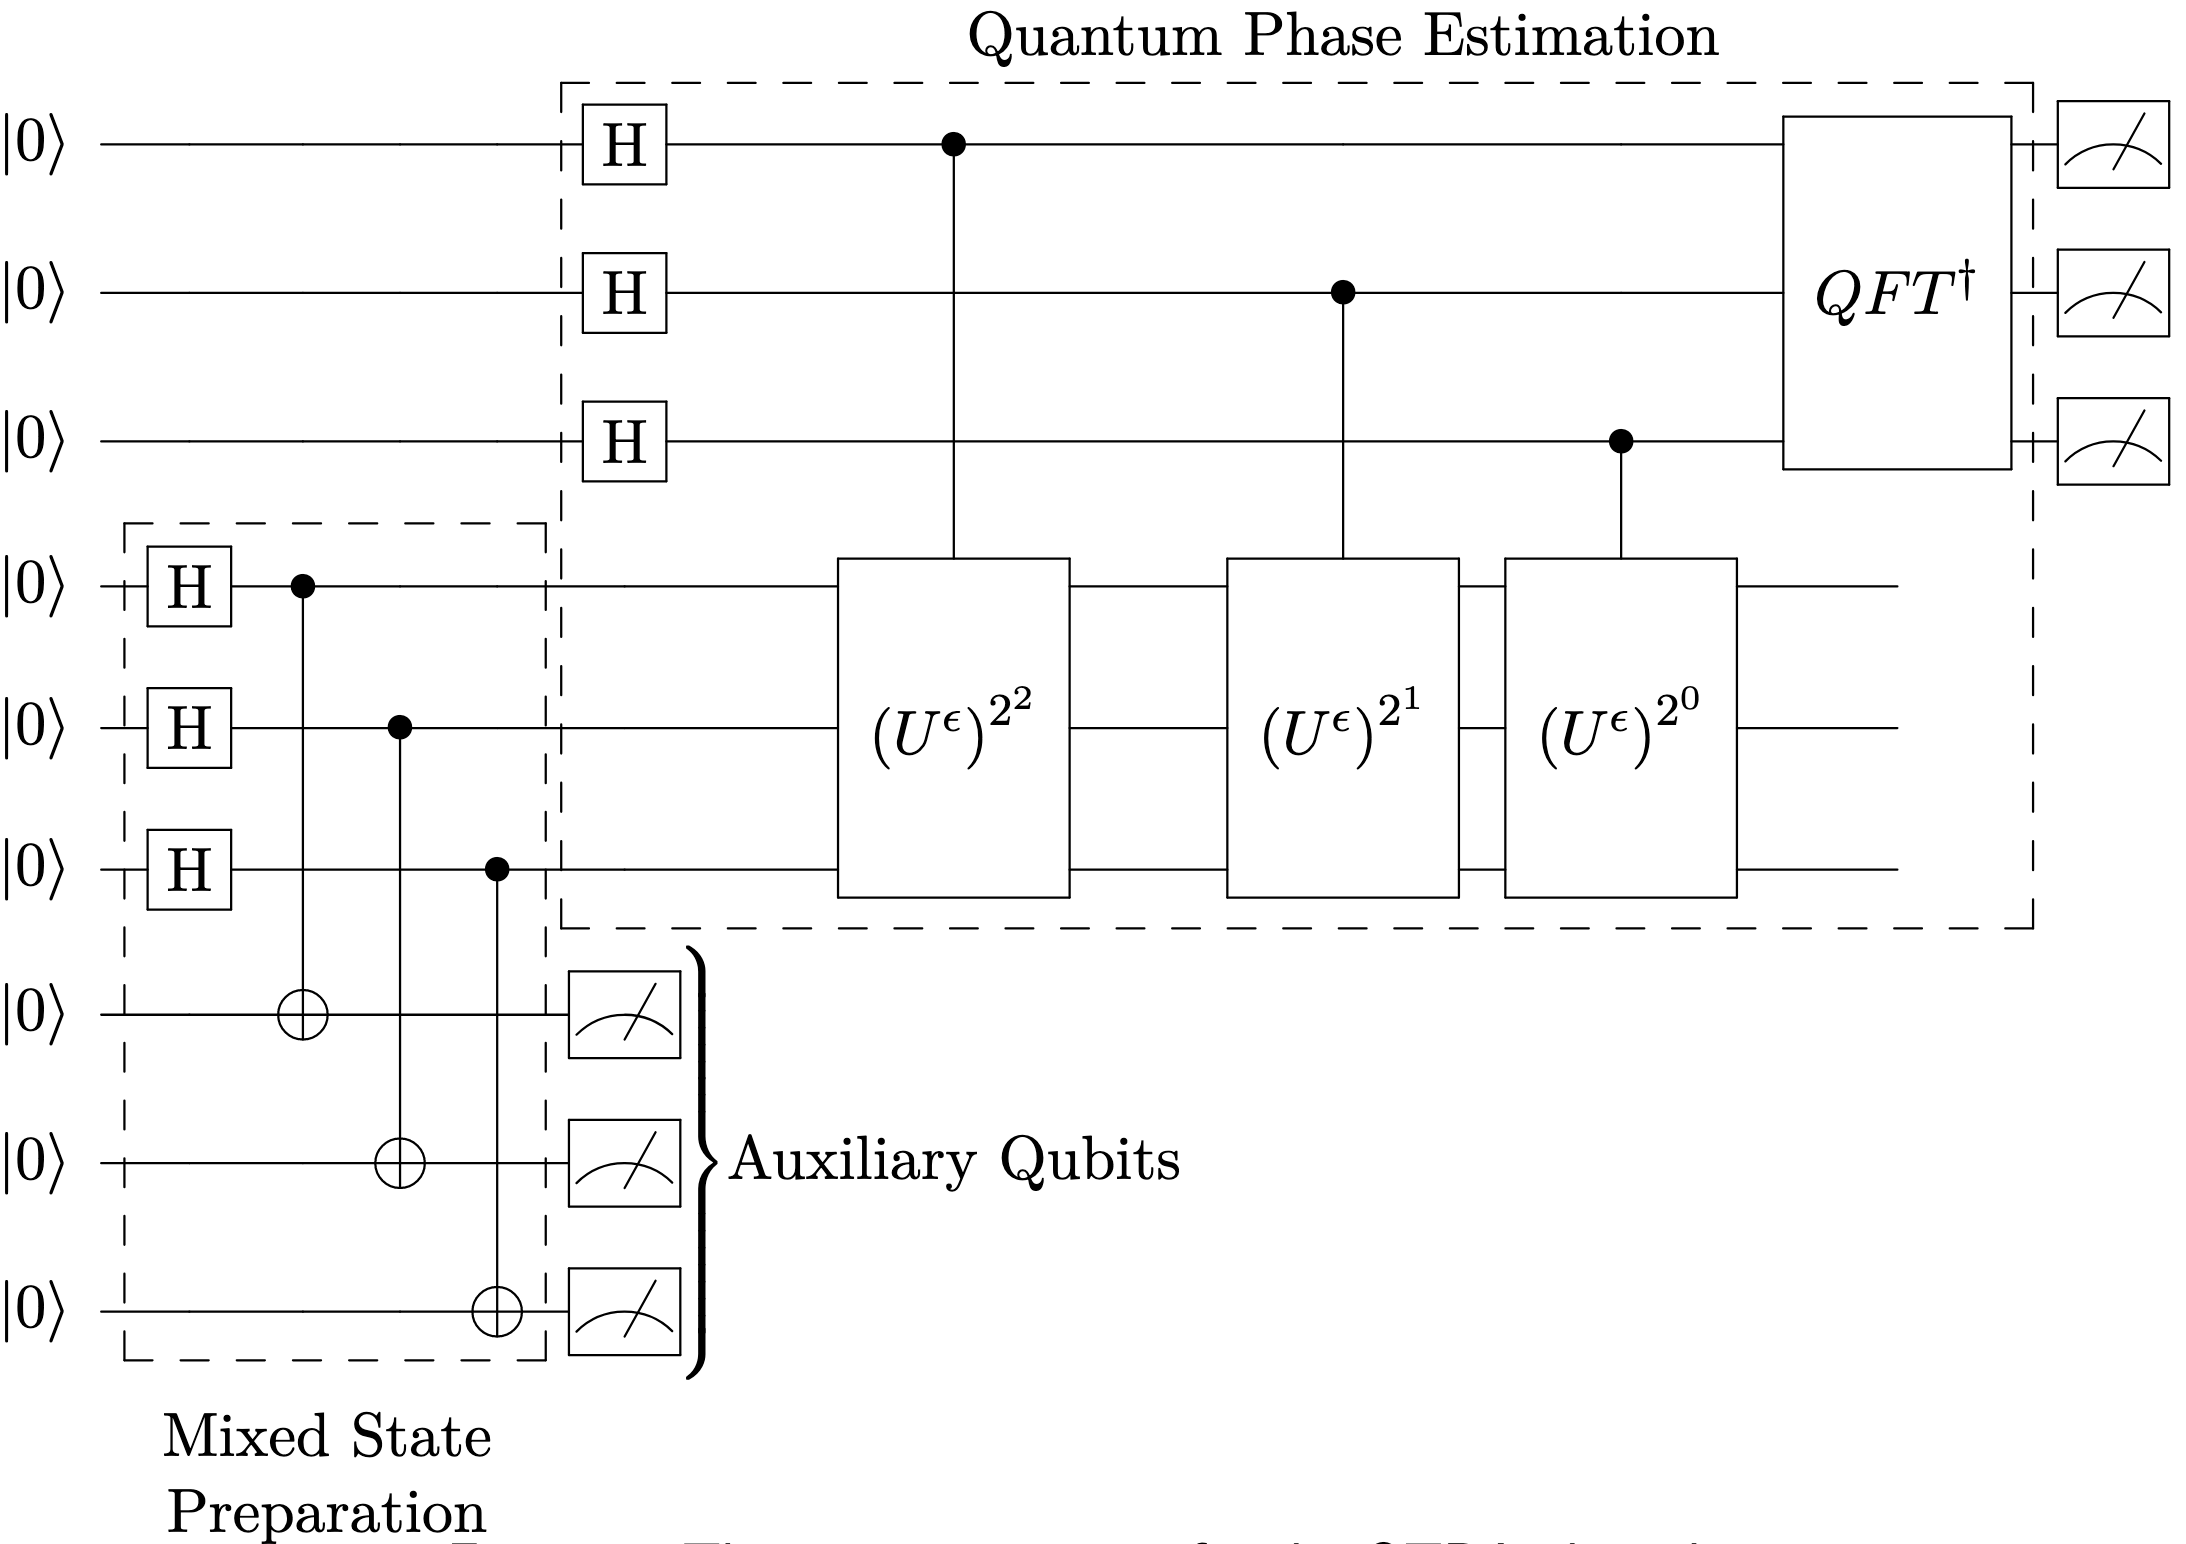


For your reference, the tutorial of QPE in several major quantum computing libraries are listed below:

* [Qiskit](https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb)
* [Pennylane](https://pennylane.ai/qml/demos/tutorial_qpe)
* [CUDA-Q](https://nvidia.github.io/cuda-quantum/latest/specification/cudaq/examples.html#quantum-phase-estimation:~:text=Quantum%20Phase%20Estimation-,%C2%B6,-C%2B%2B)
* [Cirq](https://quantumai.google/cirq/experiments/textbook_algorithms#phase_estimation)

**Example:**

In our example, the probability of measuring all-zero states is approximately $p(0)=0.137 = \tilde{\beta}_k / 2^3 \implies \tilde{\beta}_k = 1.096$, which is then rounded to $1$.

**Action:**

Utilize your preferred quantum computing library to apply QPE for estimating the number of zero eigenvalues in the Laplacian matrix. Note that the exponential of the Laplacian matrix is used as the unitary operator in QPE.

**Answer:**

In [308]:
# write your code here
#Joe's code
from qiskit import *
#example: making the laplace matrix from example

H_1 = np.array([
    [3, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, -1, -1, 0, 0, 0],
    [0, 0, 3, -1, -1, 0, 0, 0],
    [0, -1, -1, 2, 1, -1, 0, 0],    
    [0, -1, -1, 1, 2, 1, 0, 0],
    [0, 0, 0, -1, 1, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 0, 3]
])

make unitary
$U = e^{iH}$

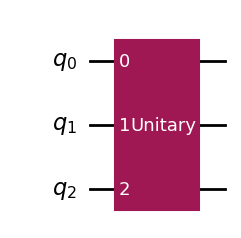

In [309]:
from scipy.linalg import expm

def make_unitaryCirc(H):
    U = expm(1j * H)


    circuitU  = QuantumCircuit(int(np.log2(U.shape[0])))
    circuitU.unitary(U, range(int(np.log2(U.shape[0]))))  

    return circuitU
circuitU = make_unitaryCirc(H_1)
circuitU.draw('mpl')


In [310]:
from qiskit.quantum_info import Operator
circuitOp = Operator.from_circuit(circuitU)
circuitOp.draw('latex')

<IPython.core.display.Latex object>

In [311]:
#make QPE
from qiskit.circuit.library import PhaseEstimation

def create_full_qpe_circuit(circuitU):
    number_of_counting_qubits = circuitU.num_qubits
    fullcircuit = QuantumCircuit(2 * number_of_counting_qubits)
    classical_reg1 = ClassicalRegister(number_of_counting_qubits, name="c1")
    fullcircuit.add_register(classical_reg1)
    classical_reg2 = ClassicalRegister(number_of_counting_qubits, name="c2")
    fullcircuit.add_register(classical_reg2)
    fullcircuit.add_register(QuantumRegister(number_of_counting_qubits, name="Aux"))
    
    for i in range(number_of_counting_qubits):
        fullcircuit.h(number_of_counting_qubits + i)
        fullcircuit.cx(number_of_counting_qubits + i, 2 * number_of_counting_qubits + i)
    
    fullcircuit.measure(range(2 * number_of_counting_qubits, 3 * number_of_counting_qubits), cbit=classical_reg2)
    fullcircuit.barrier()
    
    QPE = PhaseEstimation(number_of_counting_qubits, circuitU).decompose().decompose() #
    fullcircuit.compose(QPE, inplace=True)
    
    fullcircuit.barrier()
    fullcircuit.measure(range(number_of_counting_qubits), range(number_of_counting_qubits))
    
    
    return fullcircuit


full_qpe_circuit = create_full_qpe_circuit(circuitU)   
#full_qpe_circuit.draw('mpl')

Measurement counts (combined): {'111 011': 1, '000 011': 1, '110 100': 1, '101 010': 2, '111 000': 1, '110 011': 1, '101 101': 1, '100 000': 43, '111 110': 5, '111 101': 3, '110 001': 136, '000 101': 4, '000 000': 2, '010 000': 1, '100 110': 2, '010 010': 5, '000 100': 1, '011 100': 25, '000 110': 10, '001 000': 2, '100 011': 20, '010 011': 15, '001 110': 6, '110 110': 5, '110 101': 5, '001 111': 5, '100 010': 4, '101 110': 5, '010 101': 8, '011 111': 5, '101 000': 41, '001 100': 21, '111 001': 100, '100 001': 17, '011 001': 18, '001 010': 7, '100 101': 2, '000 001': 109, '011 010': 5, '011 011': 30, '001 001': 70, '001 011': 20, '100 111': 7, '000 010': 2, '010 110': 2, '010 001': 50, '010 111': 4, '001 101': 4, '010 100': 32, '110 000': 1, '101 001': 54, '011 110': 7, '100 100': 28, '011 000': 41, '110 010': 1, '101 011': 2}
Counts for classical_reg1: {'011': 90, '100': 108, '010': 26, '000': 132, '101': 27, '110': 42, '001': 554, '111': 21}
Counts for classical_reg2: {'111': 110, '0

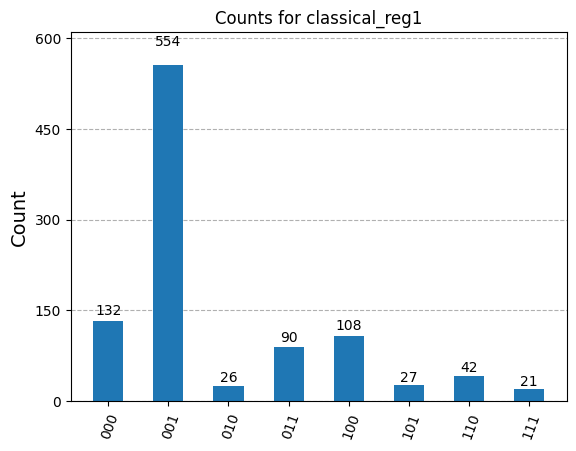

In [312]:
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram

# Assuming circuitU is already defined
full_qpe_circuit = create_full_qpe_circuit(circuitU)
number_of_counting_qubits = circuitU.num_qubits
# Use the Aer simulator
simulator = Aer.get_backend('aer_simulator')

# Execute the circuit on the simulator
job = simulator.run(full_qpe_circuit, shots=1000)

# Get the results
result = job.result()

# Get the counts (measurement outcomes)
counts = result.get_counts()

# Print the counts
print("Measurement counts (combined):", counts)

# Separate the counts for classical_reg1 and classical_reg2
counts_reg1 = {}
counts_reg2 = {}

for bitstring, count in counts.items():
    # Split the bitstring into two parts
    # classical_reg2 (auxiliary qubits) comes first, followed by classical_reg1 (evaluation qubits)
    reg2_bits, reg1_bits = bitstring.split() 
    
    # Update the counts for each register
    counts_reg1[reg1_bits] = counts_reg1.get(reg1_bits, 0) + count
    counts_reg2[reg2_bits] = counts_reg2.get(reg2_bits, 0) + count

# Print the separated counts
print("Counts for classical_reg1:", counts_reg1)
print("Counts for classical_reg2:", counts_reg2)

# Plot the counts as histograms
plot_histogram(counts_reg1, title="Counts for classical_reg1")


In [313]:
p_0 = counts_reg1.get('000', 0) / sum(counts_reg1.values())
Betti_number = round(2**number_of_counting_qubits * p_0)
print(f"Betti number: {Betti_number}")

Betti number: 1


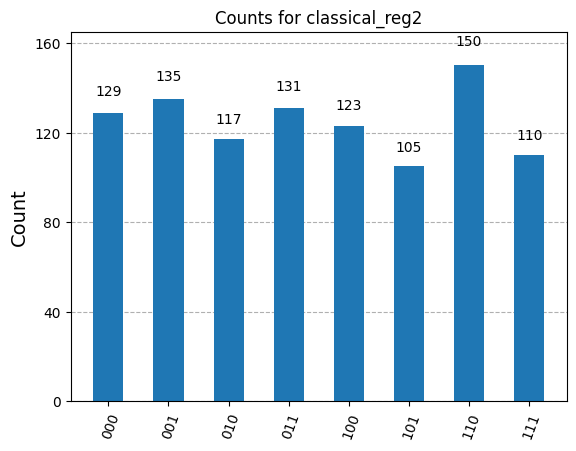

In [314]:
plot_histogram(counts_reg2, title="Counts for classical_reg2")

everyone state has an approximately $\frac{1}{8}$ chance $\rightarrow$ coherence

In [315]:
def Get_betti_numbers(index):
    list_of_hamiltonians = Get_Hamiltonian(index, verbal=False)
    List_of_betti_numbers = []
    for hamiltonian in list_of_hamiltonians:
        circuitU = make_unitaryCirc(hamiltonian)

        number_of_counting_qubits = circuitU.num_qubits

        full_qpe_circuit = create_full_qpe_circuit(circuitU)
        job = simulator.run(full_qpe_circuit, shots=1000)
        result = job.result()
        counts = result.get_counts()
        counts_reg1 = {}
        counts_reg2 = {}
        for bitstring, count in counts.items():
            reg2_bits, reg1_bits = bitstring.split() 
            counts_reg1[reg1_bits] = counts_reg1.get(reg1_bits, 0) + count
            counts_reg2[reg2_bits] = counts_reg2.get(reg2_bits, 0) + count
        

        p_0 = counts_reg1.get('0'*number_of_counting_qubits, 0) / sum(counts_reg1.values())
        Betti = round(2**number_of_counting_qubits * p_0)
        List_of_betti_numbers.append(Betti)
    return List_of_betti_numbers
        
print(Get_betti_numbers(0))


[1, 0, 0, 0]


Now we get the all the betti numbers for each of the simplex tree

In [316]:
Betti_list = []
#This is a 2 dimensional list, where the first dimension is the index of the simplex tree and the second dimension is the Betti
# numbers of the corresponding Hamiltonians.
for i in range(len(ListOf_simplex_tree)):
    Betti_list.append(Get_betti_numbers(i))

Betti_list


[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0,

In [319]:
max_length = max(len(sublist) for sublist in Betti_list)
betti_numbers_all = np.empty((window_embedding.shape[0],N+1))
betti_numbers_all = np.array([sublist + [0] * (max_length - len(sublist)) 
                         for sublist in Betti_list])

In [321]:
betti_numbers_all.shape

(5517, 4)

In [320]:
np.save("betti_numbers_alldata.npy", betti_numbers_all)

<div class="alert alert-block alert-info"> <b>NOTE</b>:

The unitary operator can be constructed by converting the exponential matrix of the Laplacian into a quantum circuit. For instance, in Qiskit, this can be implemented using `circuit.unitary(exp_matrix)`. Alternative methods for constructing the unitary operator will be optionally explored in the **BONUS** section at the end of this notebook.
</div>
<div class="alert alert-block alert-danger">
    
<b>BONUS EXERCISE:</b> 

1. Why we should measure all-zero states?
2. What is the difference between a maximally mixed state and the $(H\ket{0})^{\otimes n}$ state? Two possible aspects are:

* Plotting of their density matrix.
* Results from QPE.

3. What parameters affect the accuracy of the estimation before rounding? For Laplacian matrices of varying sizes, how does the accuracy depend on these parameters? Within what range of values do these parameters guarantee (or are highly likely to produce) a correct final result?
</div>

In [317]:
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.visualization import plot_histogram

n = 3
qc = QuantumCircuit(n, n)

# Apply a depolarizing noise channel to simulate a maximally mixed state
for qubit in range(n):
    qc.append(depolarizing_error(1, 1).to_instruction(), [qubit])

plot_state_city(DensityMatrix(qc), title="Maximally Mixed State Density Matrix")

ModuleNotFoundError: No module named 'qiskit.providers.aer'

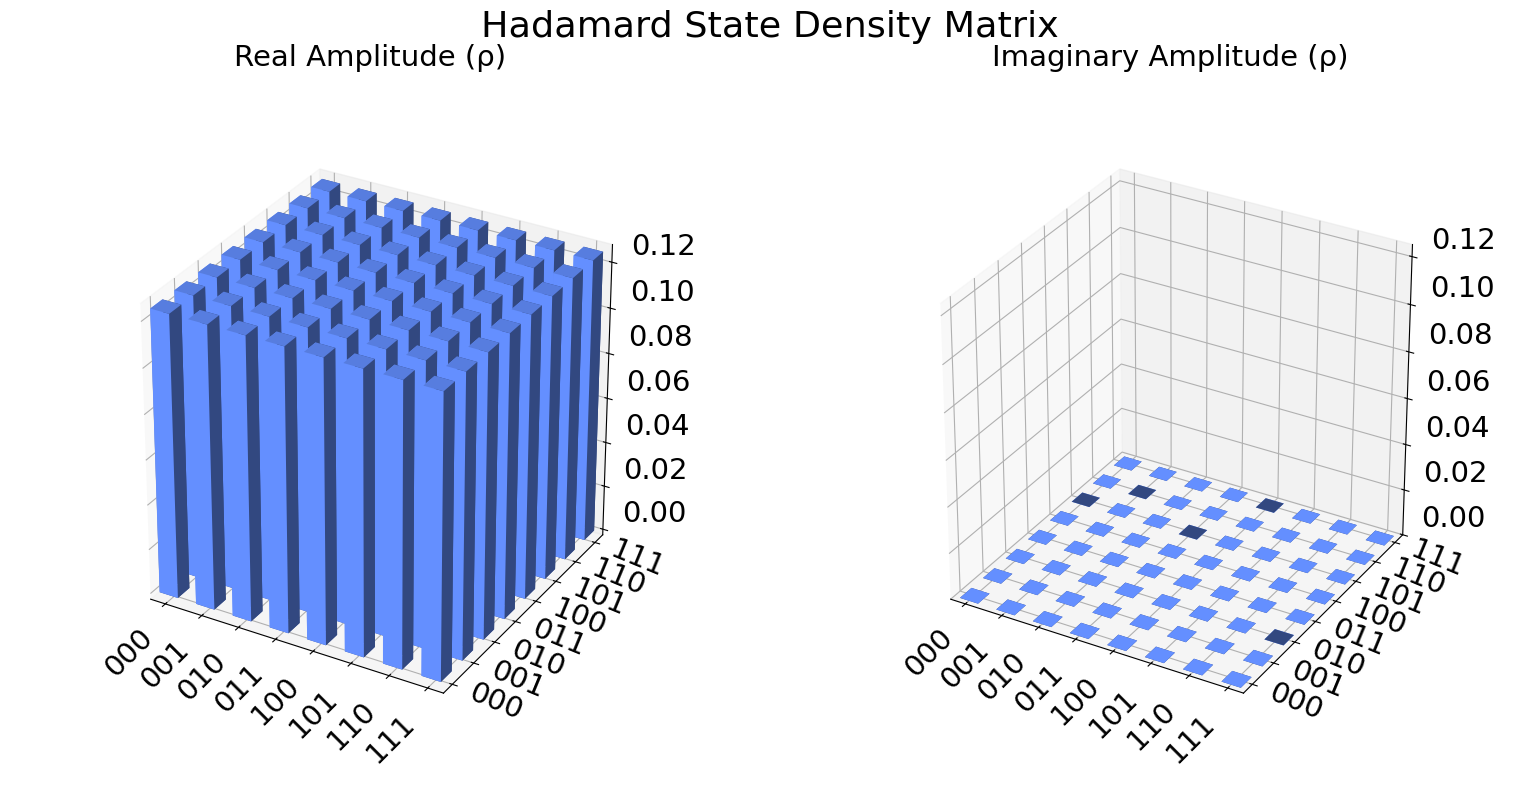

In [54]:
#for the Hadamard state
def make_hadamard_state(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    return qc
hadamard_state = make_hadamard_state(3)
plot_state_city(DensityMatrix.from_instruction(hadamard_state), title="Hadamard State Density Matrix")

Why should we measure all-zero states?


### Step 4: Detecting market crashes

**Instruction:**

At this point, we have betti curves for each window across our dataset, and we wish to use this to detect market crashes. One such way is to take the difference between these curves—or the pairwise distance—for successive windows and look for spikes. This can be done with the $L^p$ norm of the betti curve for each window, defined as follows:

$$||x||_p = (\sum_{n}^{i=1} |x_i|^p)^{1/p}$$

Combining these pairwise distances into a vector, we get a single output curve we can analyze. Experiment with different values of $p$, but a good starting point is the $L^2$ Norm. Using this, it is possible to detect regions where a market crash is occuring. Comparing detected crashes with the price data indicates how accurate the crash detection methodology is ([ref](https://github.com/giotto-ai/stock-market-crashes/blob/master/Stock%20Market%20Crash%20Detection.ipynb)). 

**Action:**

Use the $L^p$ norm to create pairwise distance curves for successive windows, and then use the results to define when a crash is occuring. Compare this with your data to see how well it performs. You may find the following classical solver is useful.

**Answer:**

In [44]:
from ripser import ripser

def classical_betti_solver(point_cloud, epsilon, dim):
    '''Return the Betti number on a given point cloud.
    Args:
        point_cloud: the point cloud after applying the sliding window.
        epsilon: resolution threshold.
        dim: the dimension on which the Betti number is calculated
    '''
    result = ripser(point_cloud, maxdim=dim)
    diagrams = result["dgms"]
    return len(
        [interval for interval in diagrams[dim] if interval[0] < epsilon < interval[1]]
    )

# write your code here

In [ ]:
from ripser import ripser

def classical_betti_solver(point_cloud, epsilon, dim):
    '''Return the Betti number on a given point cloud.
    Args:
        point_cloud: the point cloud after applying the sliding window.
        epsilon: resolution threshold.
        dim: the dimension on which the Betti number is calculated
    '''
    result = ripser(point_cloud, maxdim=dim)
    diagrams = result["dgms"]
    return len(
        [interval for interval in diagrams[dim] if interval[0] < epsilon < interval[1]]
    )

# write your code here


def lp_norm(a, b, p):
    # return np.dot(a, b)
    # if (a.shape[0] != b.shape[0]):
    #     a.append()
    # dot_product = np.dot(a, b)
    # norm_a = np.linalg.norm(a)
    # norm_b = np.linalg.norm(b)
    #return dot_product / (norm_a * norm_b)
    return np.linalg.norm(a - b, ord = p)

max_betti_index = 5
epsilon = 0.1
lp_norm_order = 2
#print(window_embedding[:,:,3].shape)
betti_numbers = []
# for i in range(window_embedding.shape[0]):
#     #print(window_embedding[i])
#     for betti_index in range(max_betti_index):
#         solution = classical_betti_solver(window_embedding[i], epsilon, dim=betti_index)
#     #print(i, solution)
#         betti_numbers.append(solution)
#     #print(f"{i + 9} : B_{betti_index} = {betti_number}")


betti_numbers =  np.empty(max_betti_index+1)
betti_numbers_all = np.empty((window_embedding.shape[0],max_betti_index+1))
for index in range(window_embedding.shape[0]):
    for betti_index in range(max_betti_index+1):
        betti_numbers_all[index, betti_index] = classical_betti_solver(window_embedding[index], epsilon, dim=betti_index)
        
    #betti_numbers_all[index] = betti_numbers
    #if (betti_numbers_all[index] != betti_numbers_all[index-1]).all():
        #print(index, betti_index, solution)


betti_distance = []
initial = betti_numbers_all[0]
for i in range(1, betti_numbers_all.shape[0]): 
    final = betti_numbers_all[i]
    betti_distance.append(lp_norm(initial, final, lp_norm_order)) 
    initial = final

# print(Betti_list)

#betti_numbers_all = np.array(Betti_list)
betti_distance_quantum = []

max_length = max(len(sublist) for sublist in Betti_list)
betti_numbers_all = np.empty((window_embedding.shape[0],max_betti_index+1))
betti_numbers_all = np.array([sublist + [0] * (max_length - len(sublist)) 
                         for sublist in Betti_list])


initial = betti_numbers_all[0]
for i in range(1, betti_numbers_all.shape[0]): 
    final = betti_numbers_all[i]
    betti_distance_quantum.append(lp_norm(initial, final, lp_norm_order)) 
    initial = final

#print(betti_numbers_all)
print(len(betti_distance))  # Print the length of betti_distance

In [ ]:
stock = np.log(pd.read_csv("sp500.csv", header=None, usecols=[0]).to_numpy().squeeze())   
#y1 = y1[:2200]
# #y1 = data['Close'].to_numpy().squeeze()
#y2 = np.pad(betti_distance, (int((y1.shape[0] - int(len(betti_distance)))/2), int((y1.shape[0] - len(betti_distance)+1)/2)) , mode='constant', constant_values=(0, 0))
t = np.arange(0, len(y1))

#data1 = y1


# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time')
# ax1.set_ylabel('exp', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel(f'betti distance', color=color)
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout() 
# plt.show()

classic = betti_distance
for i in range(len(classic), y1.shape[0]):
    classic.append(0)

#print(len(y2), y1.shape)

fig, ax1 = plt.subplots()

plt.title("Classic Results")
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('stock value', color=color)
ax1.plot(t, stock, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(f'betti distance', color=color) 
ax2.plot(t, classic, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
#plt.show()
plt.savefig("classic_test.png")


quantum = betti_distance_quantum
for i in range(len(quantum), y1.shape[0]):
    quantum.append(0)

#print(len(y2), y1.shape)

fig, ax1 = plt.subplots()

plt.title("Quantum Results")
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('stock value', color=color)
ax1.plot(t, stock, color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.title("Quantum Results")

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(f'betti distance', color=color) 
ax2.plot(t, quantum, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
#plt.show()
plt.savefig("quantum_test.png")

## *BONUS:* Explore future directions of quantum TDA

The following is a non-exhaustive list of possible next steps for the quantum TDA pipeline. It is recommended to at least explore 1 option or sub-option.

- **Find more of applications of TDA in finance**:

  There are several directions where to extend the analysis. Most work on time series analysis has used persistent homology, and more specifically, the $L^{P}$ norm of persistence landscapes, which can be used to detect early warning signals of imminent market crashes. This is precisely studied in the seminal work by Gidea and Katz, see [ref](https://arxiv.org/abs/1703.04385)
    - Analyze financial correlation network and their degree of association with Betti curves or other topological features. From the time-series of multiple stock prices, we can build time-dependent correlation networks, which exhibit topological structures and might show some association to the evolution of betti curves or other topological data measures. Generally speaking, the cross correlations in a stock market will be in the form of a high-dimension topological space, with more complicated features. One can also think about other time varying financial graphs (e.g. cryptocurrencies). The following articles can help uncover more applications: 
  
      - [Integral Betti signature confirms the hyperbolic geometry of brain, climate,and financial networks](https://www.arxiv.org/pdf/2406.15505)
      - [Using Topological Data Analysis (TDA) and Persistent Homology to Analyze the Stock Markets in Singapore and Taiwan](https://www.frontiersin.org/journals/physics/articles/10.3389/fphy.2021.572216/full)
    - Build a ML classifier or regressor on top of vectorized features such as Betti Curves (given their potential to identify trends, patterns or potential turning points in the market) to help with investment or risk management strategies. Show that Betti curves have some predictive skill, as key topological descriptors. See [ref1](https://arxiv.org/abs/2411.13881) and [ref2](https://www.sciencedirect.com/science/article/pii/S2405918823000235) for further information on the topic.
- **A hybrid and more NISQ-friendly quantum TDA pipeline**:
  
  QPE remains primarily theoretical. Its circuits are simply too deep to run on real hardware. Come up an with iterative or hybrid quantum phase estimation protocol or use tools that increase the algorithmic performance when running quantum circuits on real hardware. Benchmark them against textbook-QPE circuits. Here are some proposals to subtitute the QPE part:
    - Variational Quantum Deflation (VQD) Algorithm: VQD is a quantum algorithm that uses a variational technique to find the k eigenvalues of the Hamiltonian H of a given system. [ref](https://quantum-journal.org/papers/q-2019-07-01-156/)
    - Variational Quantum Eigensolver (VQE): Using VQE to determine the spectra of adjancency or laplacian matrix. Inspired by: [ref](https://arxiv.org/pdf/1912.12366)
  
  Finally, run some circuits on simulator + real hardware and compare the performance (runtime, noise effects, # resources) of the new proposal to the QPE solution of the above sections.

- **A proper procedure of encoding the Laplacian matrix to the unitary**:

  In Step 3, encoding the exponential matrix is recommanded. An alternative approach is to conduct the Paulis decomposition on the Laplacian, then followed by Trotterization. Can you implement this approach in your pipeline? What parameters influence the accuracy? Can you optimize your code to minimize the circuit depth?

- **Extend the quantum TDA to extract persistent Betti numbers**: 
  
  Implement a quantum TDA algorithm for persistent Betti numbers. Esstimating the persistent Betti numbers is a more general task than estimating the Betti number and it is more practical for TDA. It is an open problem to construct a quantum algorithm for the persistent Betti numbers in a way that is preferable for NISQ devices, and the only current implementation of a quantum algorithm for persistent betti number is shown [here](https://quantum-journal.org/papers/q-2022-12-07-873/pdf/).

In [45]:
# write your code here
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SLSQP
from qiskit.quantum_info import Operator, SparsePauliOp

from qiskit.primitives import Sampler, Estimator
from qiskit_algorithms.state_fidelities import ComputeUncompute

from qiskit_algorithms import VQD

from qiskit.circuit.library import RealAmplitudes

In [ ]:
def create_full_vqd_circuit(hamiltonian):
    operator_unitary = Operator(hamiltonian)
    sparse_pauli = SparsePauliOp.from_operator(operator_unitary)


    ansatz = TwoLocal(circuitU.num_qubits, rotation_blocks=["ry", "rz"], entanglement_blocks="cz", reps=1)
    # ansatz = RealAmplitudes(3, reps=1)

    optimizer = SLSQP()
    # ansatz.decompose().draw("mpl")
    estimator = Estimator()
    sampler = Sampler()
    fidelity = ComputeUncompute(sampler)

    k = 3
    betas = [33, 33, 33]

    counts = []
    values = []
    steps = []


    def callback(eval_count, params, value, meta, step):
        counts.append(eval_count)
        values.append(value)
        steps.append(step)

    vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k, betas=betas, callback=callback)
    result = vqd.compute_eigenvalues(operator=sparse_pauli)
    vqd_values = result.eigenvalues

    return vqd_values.real





In [ ]:
def Get_betti_numbers_vqd(index):
    list_of_hamiltonians = Get_Hamiltonian(index, verbal=False)
    List_of_betti_numbers = []
    for hamiltonian in list_of_hamiltonians:
        # circuitU = make_unitaryCirc(hamiltonian)

        # number_of_counting_qubits = circuitU.num_qubits

        full_qpe_circuit = create_full_vqd_circuit(hamiltonian)
        num_zeros = 0
        for val in full_qpe_circuit:
            if (round(val) == 0):
                num_zeros += 1
        # job = simulator.run(full_qpe_circuit, shots=1000)
        # result = job.result()
        # counts = result.get_counts()
        # counts_reg1 = {}
        # counts_reg2 = {}
        # for bitstring, count in counts.items():
        #     reg2_bits, reg1_bits = bitstring.split() 
        #     counts_reg1[reg1_bits] = counts_reg1.get(reg1_bits, 0) + count
        #     counts_reg2[reg2_bits] = counts_reg2.get(reg2_bits, 0) + count
        

        # p_0 = counts_reg1.get('0'*number_of_counting_qubits, 0) / sum(counts_reg1.values())
        # Betti = round(2**number_of_counting_qubits * p_0)
        List_of_betti_numbers.append(num_zeros)
    return List_of_betti_numbers

In [ ]:
Betti_list_vqd = []
#This is a 2 dimensional list, where the first dimension is the index of the simplex tree and the second dimension is the Betti
# numbers of the corresponding Hamiltonians.
for i in range(len(ListOf_simplex_tree)):
    Betti_list_vqd.append(Get_betti_numbers_vqd(i))

Betti_list_vqd

# This is the end of the challenge. Good luck!